shannonEnt:1.3260875253642983
shannonEnt:1.061278124459133
shannonEnt:1.5
shannonEnt:1.2987949406953985
shannonEnt:1.188721875540867
shannonEnt:1.384431504340598
shannonEnt:0.9798687566511527
shannonEnt:0.9182958340544896
shannonEnt:0.0
shannonEnt:1.5545851693377994
最优特征索引值：3
bestFeat:
3
shannonEnt:1.5545851693377994
shannonEnt:1.5
shannonEnt:1.0
shannonEnt:1.5
shannonEnt:1.4591479170272446
shannonEnt:1.4591479170272448
shannonEnt:0.6500224216483541
shannonEnt:0.9182958340544896
最优特征索引值：2
bestFeat:
2
shannonEnt:0.6500224216483541
shannonEnt:1.0
shannonEnt:0.0
shannonEnt:0.0
shannonEnt:0.0
shannonEnt:0.9182958340544896
最优特征索引值：0
bestFeat:
0
shannonEnt:1.0
shannonEnt:0.0
shannonEnt:0.0
最优特征索引值：0
bestFeat:
0
shannonEnt:0.9182958340544896
shannonEnt:1.0
shannonEnt:0.0
shannonEnt:1.0
shannonEnt:0.9182958340544896
shannonEnt:0.0
最优特征索引值：1
bestFeat:
1
shannonEnt:0.9182958340544896
shannonEnt:0.0
shannonEnt:0.0
shannonEnt:0.0
最优特征索引值：0
bestFeat:
0
{'tearRate': {'reduced': 'no lenses', 'normal'

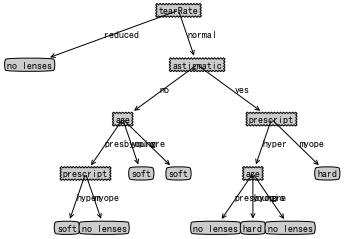

程序运行时间：1.3861941587292677 秒


In [10]:
from math import log
import time
import operator
import treePlotter
"""
函数说明：创建测试数据集

parameters:
    无
returns:
    数据集，标签
"""

def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

"""
函数说明：计算给定数据集的香农熵

Parameters: 
    dataSet 数据集

Returns: 
    shannonEnt 经验熵（香农熵）
    
Tips:
    无
    
Author:
    ZLin

Modify:
    2018-11-06
    
"""
def calcShannonEnt(dataSet):
    #计算数据集实例的总数，显式保存
    numEntries = len(dataSet)
    #创建一个数据字典，键值为最后一列的数值
    labelCounts = {}
    for featVec in dataSet:
        #当前键值
        currentLabel = featVec[-1]
        #如果当前键值不存在，则扩展字典并将当前键值加入字典
        if currentLabel not in labelCounts.keys():
            #每个键值记录了当前类别出现的次数
            labelCounts[currentLabel] = 0
        #计数
        labelCounts[currentLabel] += 1
    #经验熵（香农熵）
    shannonEnt = 0.0
    #计算香农熵
    for key in labelCounts:
        #选择该标签的概率
        prob = float(labelCounts[key]) / numEntries
        #利用公式计算香农熵
        shannonEnt -= prob * log(prob, 2)
    #返回香农熵
    print("shannonEnt:" + str(shannonEnt))
    return shannonEnt


"""
函数说明：按照给定特征划分数据集

Parameters: 
    dataSet 带划分的数据集
    axis 划分数据集的特征
    value 需要返回的特征的值

Returns: 
    retDataSet 划分后的数据集
    
Tips:
    Python中列表自带的extend()和append()方法
    extend():在列表末尾一次性追加另一个序列中的多个值（用新列表扩展原来的列表）
    append():在列表末尾添加新的对象
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def splitDataSet(dataSet, axis, value):
    #声明新列表对象
    retDataSet = []
    #遍历数据集中每个元素，每个元素也是列表
    for featVec in dataSet:
        #发现符合要求的值，将数据抽取出来
        if featVec[axis] == value:
            #去掉axis特征
            reducedFeatVec = featVec[:axis] 
            #print("reducedFeatVec:")
            #print(reducedFeatVec)
            #将符合条件的元素添加到返回的列表
            reducedFeatVec.extend(featVec[axis + 1:])
            #print("reducedFeatVec2:")
            #print(reducedFeatVec)
            retDataSet.append(reducedFeatVec)
            #print("retDataSet")
            #print(retDataSet)
    return retDataSet

"""
函数说明：选择最好的特征划分方式

Parameters: 
    dataSet 数据集

Returns: 
    bestFeature 最好的划分数据集的特征
    
Tips:
    使用列表推导（List Comprehension）创建新列表
    从列表中创建集合set是Python中得到列表中唯一元素值的最快方法
    
Author:
    ZLin

Modify:
    2018-11-06
    
"""
def chooseBestFeatureToSplit(dataSet):
    #特征数量
    numFeatures = len(dataSet[0]) - 1
    #计算原始香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #信息增益
    bestInfoGain = 0.0
    #最优特征的索引值
    bestFeature = -1
    #遍历数据集中的所有所有特征
    for i in range(numFeatures):
        #使用列表推导创建新的列表：将数据集中所有第i个特征值或者所有可能存在的值写入新list
        featList = [example[i] for example in dataSet]
        #从列表中创建集合：集合中的每个值互不相同，得到列表中唯一元素值的最快方法
        uniqueVals = set(featList)
        newEntropy = 0.0
        #遍历当前特征中的所有唯一属性值
        for value in uniqueVals:
            #对每个唯一属性值划分一次数据集
            subDataSet = splitDataSet(dataSet, i , value)
            #计算数据集的概率
            prob = len(subDataSet) / float(len(dataSet))
            #根据公式计算熵值，并求和
            newEntropy += prob * calcShannonEnt(subDataSet)
        #信息增益是熵的减少：用于度量数据无序度的减少
        infoGain = baseEntropy - newEntropy
        #print("第%d个特征的增益为%.3f" % (i, infoGain))
        #比较信息增益
        if (infoGain > bestInfoGain):
            #更新信息增益，找到最大信息增益
            bestInfoGain = infoGain
            #找到最大信息增益的索引值
            bestFeature = i
    #返回信息增益最大的特征索引值
    print("最优特征索引值："+ str(bestFeature))
    return bestFeature


"""
函数说明：统计classList中出现次数最多的元素(类标签,分类名称)

Parameters: 
    classList 类标签列表

Returns: 
    sortedClassCount[0][0] 出现次数最多的类标签
    
Tips:
    
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        #统计每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    print("sortedClassCount:" + str(sortedClassCount))
    #返回出现次数最多的元素
    return sortedClassCount[0][0]


"""
函数说明：创建树

Parameters: 
    dataSet 数据集
    labels 标签列表：包含数据集中所有特征的标签
    featLabels 存储选择的最优特征标签
Returns: 
    myTree 树
    
Tips:
    
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def createTree(dataSet, labels):
    #列表变量取所有分类标签：是否是鱼 'yes' 'no'
    classList = [example[-1] for example in dataSet]
    #print("classList:")
    #print(classList)
    #所有的类标签完全相同，则返回该类标签
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    #选择最优特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    print("bestFeat:")
    print(bestFeat)
    #获取最优特征的标签
    bestFeatLabel = labels[bestFeat]
#     featLabels.append(bestFeatLabel)
    #字典类型：根据最优特征的标签生成树
    myTree = {bestFeatLabel:{}}
    #删除已经使用的特征标签
    del(labels[bestFeat])
    #得到训练集中所有最优特征的属性值
    featValues = [example[bestFeat] for example in dataSet]
    #获取所有唯一不重复的属性值
    uniqueVals = set(featValues)
    #遍历当前选择特征包含的所有属性值，递归调用函数createTree()创建决策树
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree
    
"""
函数说明：使用决策树的分类函数

Parameters: 
    inputTree 决策树
    featLabels 最优特征标签
    testVec 测试数据列表
Returns: 
    classLabel 分类标签
    
Tips:
    iter()生成迭代器，next(iter())返回迭代器的下一个项目
    
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def classify(inputTree, featLabels, testVec):
    #获取决策树结点,iter()生成迭代器，next(iter())返回迭代器的下一个项目
    #firstStr = inputTree.keys()[0]
    firstStr = next(iter(inputTree))
    #下一个字典
    secondDict = inputTree[firstStr]
    #使用index方法查找当前列表中第一个匹配firstStr变量的元素
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        #比较testVec变量中的值与树结点的值，如果到达叶子结点，则返回当前结点的分类标签
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
    
    
if __name__ == '__main__':
    start = time.clock()
    fr = open('lenses.txt')
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
#     featLabels = []
#     lensesTree = createTree(lenses, lensesLabels,featLabels)
    lensesTree = createTree(lenses, lensesLabels)
    treePlotter.createPlot(lensesTree)
#     print(lensesTree)
#     dataSet, labels = createDataSet()
#     print(dataSet)
# #     print("最优特征索引值:" + str(chooseBestFeatureToSplit(dataSet)))
#     featLabels = []
#     myTree = createTree(dataSet, labels, featLabels)
#     print(myTree)
#     testVec = [1, 1]
#     classLabel = classify(myTree, featLabels, testVec)
#     print(classLabel)
    end = time.clock()
    print("程序运行时间：%s 秒" % (end - start))
    

In [18]:
import pickle
"""
函数说明：使用pickle模块存储决策树

Parameters: 
    inputTree 已经生成的决策树
    filename 存储文件名
    
Returns: 
    无
Tips:
    pickle序列化对象，序列化对象可以在磁盘上保存对象，并在需要的时候读取出来
    读写模式:r只读,r+读写,w新建(会覆盖原有文件),a追加,b二进制文件.常用模式
    rb  以二进制读模式打开
    wb  以二进制写模式打开 (参见 w )
    w   以写方式打开
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def storeTree(inputTree, filename):
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

if __name__ == '__main__':
    myTree = {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
    storeTree(myTree, 'classifierStorage.txt')


In [19]:
import pickle
"""
函数说明：使用pickle读取决策树

Parameters:
    filename 决策树存储的文件名
    
Returns: 
    无
Tips:
    pickle序列化对象，序列化对象可以在磁盘上保存对象，并在需要的时候读取出来
     
Author:
    ZLin

Modify:
    2018-11-06
    
"""

def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

if __name__ == '__main__':
    myTree = grabTree('classifierStorage.txt')
    print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
